In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.io import loadmat
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

## 一

### （1）神经网络模型的假设  

> - 假设：  
> 图中展示的网络包括了**一个输入层**、**两个隐藏层**和**一个输出层**，三者关系通过向前传播实现。  
>> 输入层：提供原始数据；  
>> 隐藏层：处理输入层的数据；  
>> 输出层：基于隐藏层的输出进行最后的决策或预测。
>
> 层与层之间的向前传播通过权重矩阵与相应函数的形式实现：

### （2）实现  
> - 假设激活函数为$$h_\theta(x)=g(\theta^Tx)$$，则具体向量化实现
> - 输入层（Layer1）到隐藏层（Layer2）
> 假设权重矩阵为$$\Theta_1 = \begin{pmatrix}\theta^{(1)}_{10}&\theta^{(1)}_{20}&\theta^{(1)}_{30}\\\theta^{(1)}_{11}&\theta^{(1)}_{21}&\theta^{(1)}_{31}\\\theta^{(1)}_{12}&\theta^{(1)}_{22}&\theta^{(1)}_{32}\\\theta^{(1)}_{13}&\theta^{(1)}_{23}&\theta^{(1)}_{33}\end{pmatrix}$$
>  则$$ \begin{pmatrix} a^{(2)}_1 \\ a^{(2)}_2 \\ a^{(2)}_3 \end{pmatrix} = g(\Theta^{T}_1 X)=g(\begin{pmatrix}\theta^{(1)}_{10}&\theta^{(1)}_{11}&\theta^{(1)}_{12}&\theta^{(1)}_{13}\\\theta^{(1)}_{20}&\theta^{(1)}_{21}&\theta^{(1)}_{22}&\theta^{(1)}_{23}\\\theta^{(1)}_{30}&\theta^{(1)}_{31}&\theta^{(1)}_{32}&\theta^{(1)}_{33}\end{pmatrix}\begin{pmatrix}1\\x_1\\x_2\\x_3\end{pmatrix})$$
> - 隐藏层1（Layer1）到隐藏层2（Layer2）  
> 假设权重矩阵为$$\Theta_2 = \begin{pmatrix}\theta^{(2)}_{10}&\theta^{(2)}_{20}\\\theta^{(2)}_{11}&\theta^{(2)}_{21}\\\theta^{(2)}_{12}&\theta^{(2)}_{22}\\\theta^{(2)}_{13}&\theta^{(2)}_{23}\end{pmatrix}$$  
> 则$$ \begin{pmatrix} a^{(3)}_1 \\ a^{(3)}_2 \end{pmatrix}=g(\begin{pmatrix}\theta^{(2)}_{10}&\theta^{(2)}_{11}&\theta^{(1)}_{12}&\theta^{(2)}_{13}\\\theta^{(2)}_{20}&\theta^{(2)}_{21}&\theta^{(2)}_{22}&\theta^{(2)}_{23}\\\end{pmatrix}\begin{pmatrix}1\\ a^{(2)}_1 \\ a^{(2)}_2 \\ a^{(2)}_3\end{pmatrix})$$  
> - 隐藏层2（Layer2）输出层（Layer4）  
> 假设权重矩阵为$$\Theta_2 = \begin{pmatrix}\theta^{(3)}_0\\\theta^{(3)}_1\\\theta^{(3)}_2\end{pmatrix}$$
> 则$$ h_\theta(x)=a^{(4)}_1=g(\begin{pmatrix}\theta^{(3)}_0&\theta^{(3)}_1&\theta^{(3)}_2\end{pmatrix}\begin{pmatrix}1\\a^{(3)}_1 \\ a^{(3)}_2\end{pmatrix})$$

## 二

In [2]:
# 样本
data = loadmat('HwDigits.mat')
X = data['X']
y = data['y']

## (1)

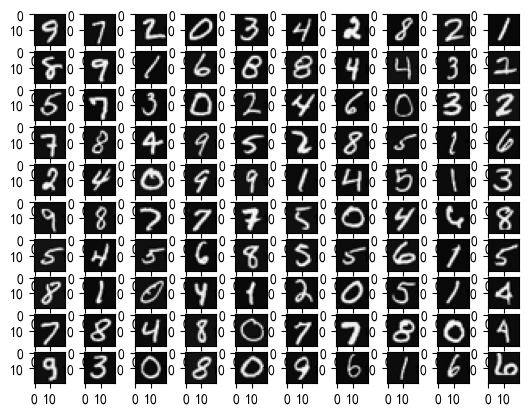

In [3]:
# 随机选取100张灰度图
m, n = X.shape

num = np.random.randint(0, m-1, 100)
data = X[num, :]

fig, ax = plt.subplots(10, 10)

for i in range(10):
    for j in range(10):
        im = data[i*10 + j].reshape(20, 20, order='F')
        ax[i, j].imshow(im, cmap='gray')

## (2)

In [4]:
# 权重
weights = loadmat('HwDigitsWeights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [5]:
def g(z):
    gz = 1/(1+np.e**(-z))
    return gz

In [6]:
# 输入层 ——> 隐藏层
A_1 = sm.add_constant(X)
A_2 = g(A_1@Theta1.T)
print(A_1.shape)

(5000, 401)


In [7]:
# 隐藏层 ——> 输出层
A_2_ = sm.add_constant(A_2)
A_3 = g(A_2_@Theta2.T)
print(A_2.shape)
print(A_3.shape)
print(Theta1.shape)
print(Theta2.shape)

(5000, 25)
(5000, 10)
(25, 401)
(10, 26)


In [8]:
# 预测值
y_hat = np.argmax(A_3, axis=1)+1

# 是否准确(True or False)
correct = np.array([y_hat[i]==y[i] for i in range(len(y))])

# 准确率
accuracy = sum(correct)/len(y)
print(f'预测准确率为{accuracy[0]}')

预测准确率为0.9752
